In [1]:
from monte_carlo import monte_carlo
import numpy as np

def getenergy(count):
    density, temp = 0.8442, 0.728
    step = count*1000
    sim = monte_carlo(maxstep=step, temp=temp, count=count, size=np.sqrt(count/density), mode='hard',
                  dimension=2, rand=True, start_recording=step*0.6, recording_interval=50)
    elist = np.array(sim.get_energy_per_step())
    ae = np.average(elist)
    pe = np.sqrt(np.average(elist*elist) - ae**2)
    return ae, pe

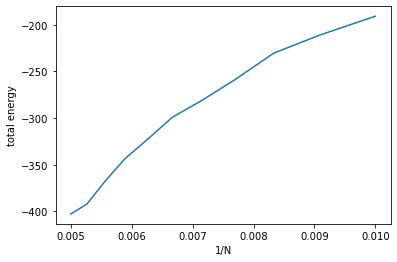

In [2]:
from matplotlib import pyplot as plt

Nlist = np.arange(100, 201, 10)
xlist = [1/i for i in Nlist] 
ylist = []
plist = []
for i in Nlist:
    ae, pe = getenergy(i)
    ylist.append(ae)
    plist.append(pe) 
# plt.yscale('log')
plt.xlabel('1/N')
plt.ylabel('total energy')
plt.plot(xlist, ylist)
plt.savefig("fig/sc_exp1_e_hard.eps",format='eps')

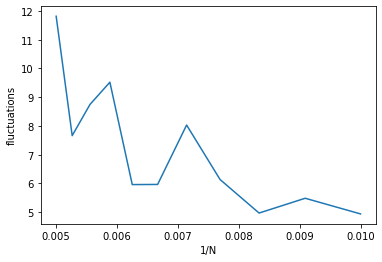

In [3]:
plt.plot(xlist, plist)
plt.xlabel('1/N')
plt.ylabel('fluctuations')
plt.savefig("fig/sc_exp1_p_hard.eps",format='eps')

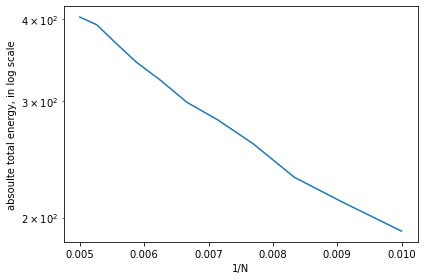

In [5]:
newlist = np.array(ylist)
newlist*=-1
plt.yscale('log')
plt.ylabel('absoulte total energy, in log scale')
plt.xlabel('1/N')
plt.plot(xlist, newlist)
plt.tight_layout()
plt.savefig("fig/sc_exp1_loge_hard.eps",format='eps')